# Project1 : 당뇨병 진척도 예측하기

나이, 성별, bmi 등 10종의 데이터 기반으로 데이터 수집 당시를 기준으로 1년 뒤 비만의 진행 정도를 정량적으로 측정한 데이터

해당 데이터를 기반으로 학습된 모델을 통해 데이터가 입력되었을 때, 비만의 진척도를 정수로 표현하는 것이 목적이다.

데이터 설명
총 442명의 데이터가 존재하며 10개의 column은 전부 수치형 데이터로 구성되어 있다.

출처 : [Scikit-learn 공식 문서-비만 데이터](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

- age : 나이
- sex : 성별
- bmi : BMI (body mass index) 값
- bp : 평균 혈압
- s1 : tc, 총 혈청 콜레스테롤
- s2 : ldl, 저밀도 지질단백질
- s3 : hdl, 고밀도 지질단백질
- s4 : tch, 총 콜레스테롤/HDL
- s5 : ltg, 아마도 혈청 트리글리세리드 수치의 로그값
- s6 : glu, 혈당 수치



> Scikit-learn 공식 문서에 위와 같이 작성되어 있다. 공식 문서에서 "아마도"라는 추측성 문구가 포함 된 것에 의문이 생겨 자료를 찾아보았지만 그 이유에 대해서 명확하게 답을 찾지 못했다. 따라서 구글 제미나이에 물어 본 결과 해당 데이터는 실제 논문에서는 선형 회귀 모델 학습의 새로운 통계적 방법인 Least Angle Regression(LARS)의 효용성을 증명하기 위해 사용된 데이터셋으로 의학적 지식을 대부분 제하고 작성되어 s1~s6로 대체된 6개의 혈청 정보라고만 소개했다고 한다.또한 이 데이터는 raw data가 아닌 전처리된 데이터로 모두 표준화까지 완료되어 있으며 R을 사용한 데이터 분석을 진행할 때 column의 이름에 포함된 정보를 기반으로 이후 연구자들이 추측한 정보라고 한다.

## 데이터 불러오기

In [ ]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

In [ ]:
import numpy as np

X = np.array(df_X)

print(type(X), X.dtype)

<class 'numpy.ndarray'> float64


In [ ]:
y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


## train-test 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## 모델 생성

In [ ]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


In [ ]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [ ]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [ ]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [ ]:
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [ ]:
LEARNING_RATE = 0.8

## 모델 학습

In [ ]:
%%timeit -n 1 -r 1
global W, b

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 3598.4192
Iteration 200 : Loss 3183.6744
Iteration 300 : Loss 3033.8929
Iteration 400 : Loss 2966.1421
Iteration 500 : Loss 2933.5655
Iteration 600 : Loss 2917.2667
Iteration 700 : Loss 2908.7799
Iteration 800 : Loss 2904.1660
Iteration 900 : Loss 2901.5365
Iteration 1000 : Loss 2899.9580
149 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## 모델 평가하기

In [ ]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2876.6008883620248)

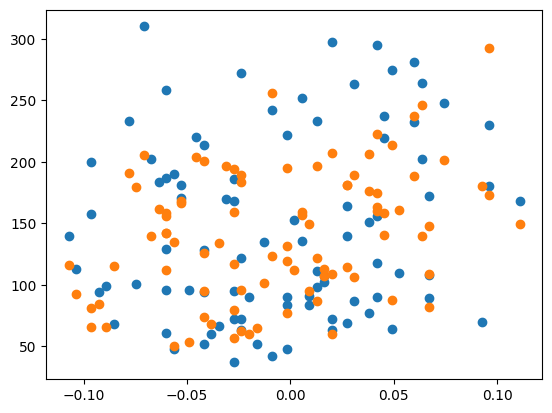

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# Project 2 : 자전거 대여량 예측하기

## 데이터 준비하기

In [ ]:
!cp -r /content/drive/MyDrive/AIFFEL/bike-sharing-demand ./

## 데이터 확인 및 분석

In [ ]:
import pandas as pd

train = pd.read_csv("./bike-sharing-demand/train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

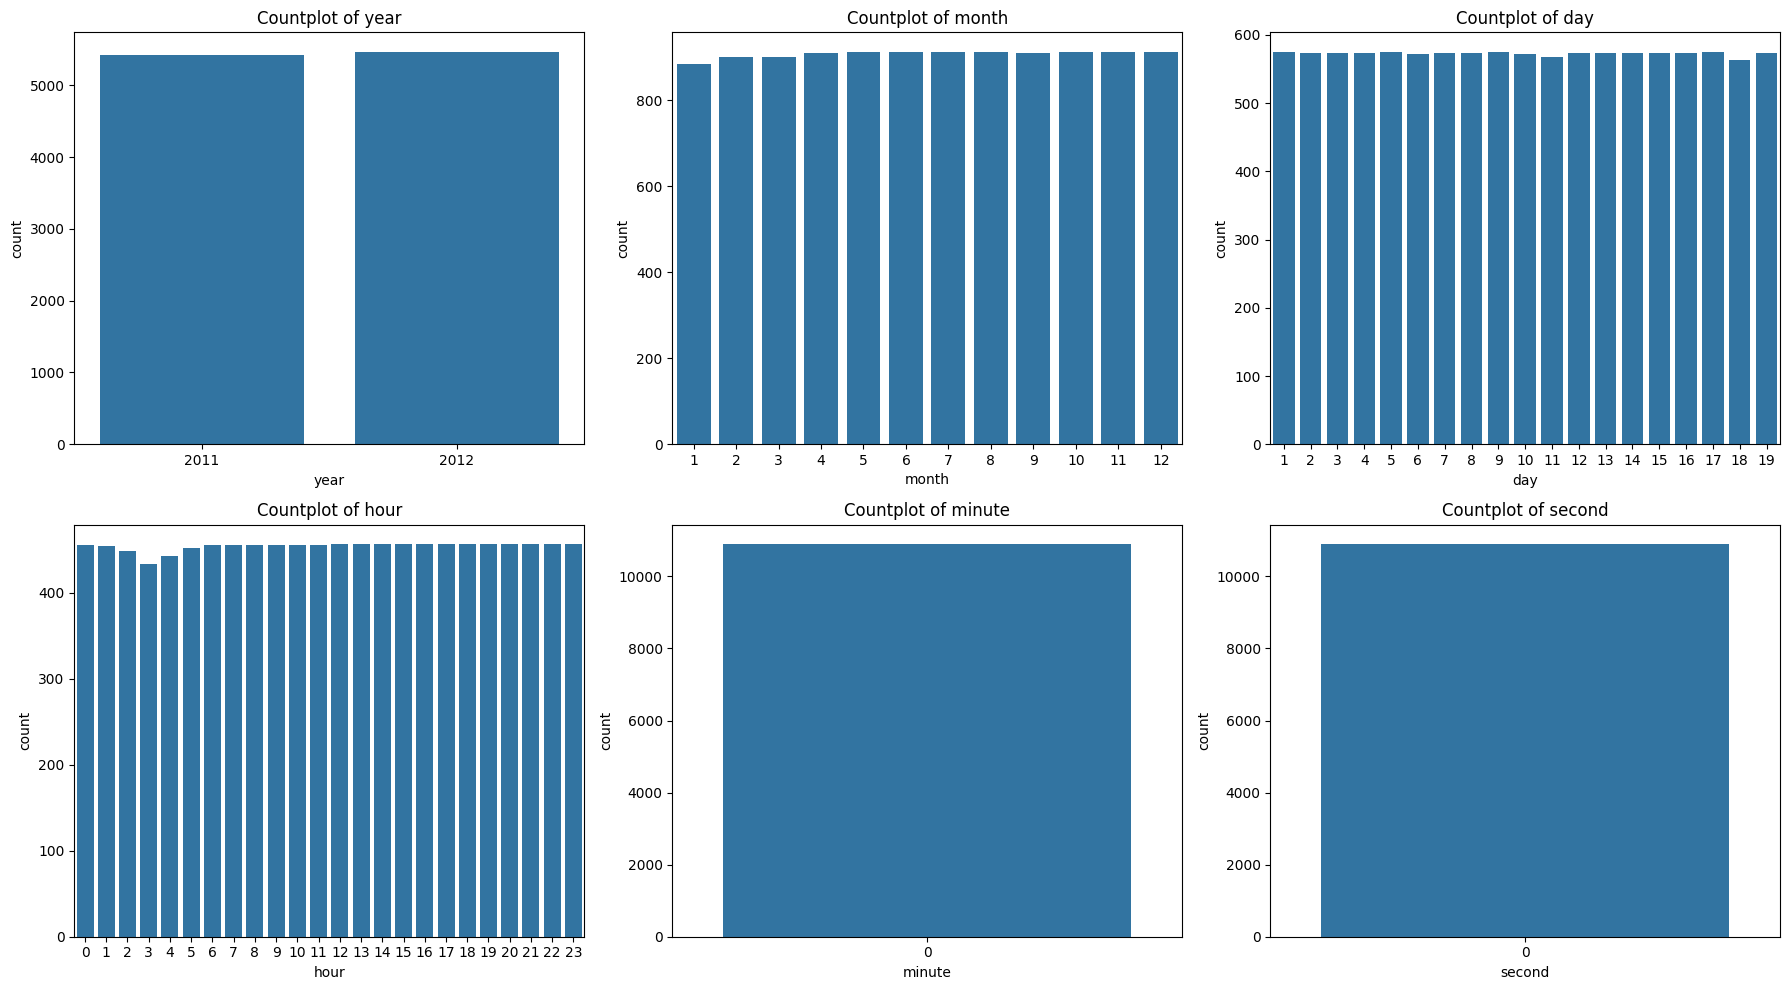

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
cols = ['year', 'month', 'day', 'hour', 'minute', 'second']
for ax, col in zip(axs.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

## 모델 생성 및 학습

In [ ]:
features = ['year', 'month', 'day', 'hour', 'temp', 'humidity', 'windspeed']
X = train[features]
y = train['count']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 결과

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 19961.901814435438
RMSE: 141.2865946027274


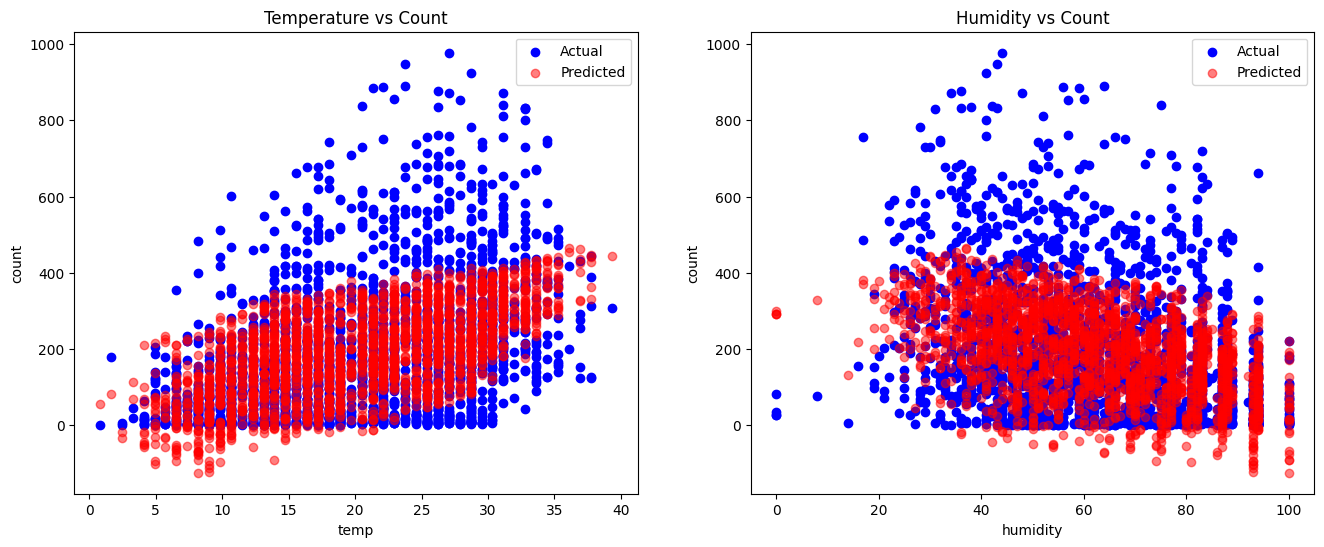

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count 시각화
axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count 시각화
axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()